# Phần 3. `DEMO với dữ liệu NYCFLIGHTS`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)
print(sns.__version__)

1.3.4
0.11.2


In [2]:
%matplotlib inline
# Set kích thước mặc định cho các biểu đồ Seaborn
sns.set(rc={'figure.figsize':(7, 5)})

# 0. Load dữ liệu và kiểm tra sơ bộ thông tin

In [3]:
# Load dữ liệu từ file và chọn các cột cần dùng

#cols = ['origin', 'dep_delay', 'arr_delay', 'carrier', 'distance', 'air_time']
#fdata = pd.read_csv('flight-data/nycflights.csv', usecols=cols)
fdata = pd.read_csv('data/nycflights.csv', index_col=0)
fdata.drop(['dep_time','tailnum', 'arr_time', 'flight', 'dest'], inplace=True, axis=1)
fdata.head()

,year,month,day,dep_delay,arr_delay,carrier,origin,air_time,distance,hour,minute
1,2013,1,1,2.0,11.0,UA,EWR,227.0,1400,5.0,17.0
2,2013,1,1,4.0,20.0,UA,LGA,227.0,1416,5.0,33.0
3,2013,1,1,2.0,33.0,AA,JFK,160.0,1089,5.0,42.0
4,2013,1,1,-1.0,-18.0,B6,JFK,183.0,1576,5.0,44.0
5,2013,1,1,-6.0,-25.0,DL,LGA,116.0,762,5.0,54.0


**Loại bỏ tất cả các dòng có xuất hiện bất cứ NaN nào**

In [4]:
# Loại bỏ tất cả các dòng có NaN
# Lưu ý: nếu chọn axis=1 sẽ bỏ các cột có NaN
fdata.dropna(inplace=True, axis=0, how="any")
fdata.reset_index(inplace=True, drop=True)
fdata

,year,month,day,dep_delay,arr_delay,carrier,origin,air_time,distance,hour,minute
0,2013,1,1,2.0,11.0,UA,EWR,227.0,1400,5.0,17.0
1,2013,1,1,4.0,20.0,UA,LGA,227.0,1416,5.0,33.0
2,2013,1,1,2.0,33.0,AA,JFK,160.0,1089,5.0,42.0
3,2013,1,1,-1.0,-18.0,B6,JFK,183.0,1576,5.0,44.0
4,2013,1,1,-6.0,-25.0,DL,LGA,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
327341,2013,9,30,-5.0,-17.0,B6,JFK,41.0,209,22.0,40.0
327342,2013,9,30,-10.0,-20.0,B6,JFK,52.0,301,22.0,40.0
327343,2013,9,30,-5.0,-16.0,B6,JFK,47.0,264,22.0,41.0
327344,2013,9,30,12.0,1.0,B6,JFK,33.0,187,23.0,7.0


In [5]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       327346 non-null  int64  
 1   month      327346 non-null  int64  
 2   day        327346 non-null  int64  
 3   dep_delay  327346 non-null  float64
 4   arr_delay  327346 non-null  float64
 5   carrier    327346 non-null  object 
 6   origin     327346 non-null  object 
 7   air_time   327346 non-null  float64
 8   distance   327346 non-null  int64  
 9   hour       327346 non-null  float64
 10  minute     327346 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 27.5+ MB


# FacetGrid

## 1. Phân tích về các chuyến bay trễ (delay) và không-trễ (not-delay) theo các sân bay

**Thêm cột cho biết 1 chuyến bay là xuất phát trễ hay không trễ**

In [6]:
# Tạo thêm cột mới xác định 1 chuyến bay là xuất phát trễ hay không
fdata['dep_delay2'] = fdata['dep_delay'] > 0
fdata.head()

,year,month,day,dep_delay,arr_delay,carrier,origin,air_time,distance,hour,minute,dep_delay2
0,2013,1,1,2.0,11.0,UA,EWR,227.0,1400,5.0,17.0,True
1,2013,1,1,4.0,20.0,UA,LGA,227.0,1416,5.0,33.0,True
2,2013,1,1,2.0,33.0,AA,JFK,160.0,1089,5.0,42.0,True
3,2013,1,1,-1.0,-18.0,B6,JFK,183.0,1576,5.0,44.0,False
4,2013,1,1,-6.0,-25.0,DL,LGA,116.0,762,5.0,54.0,False


**Kiểm tra tương quan giữa xuất phát trễ/không-trễ và đến nơi trễ của các sân bay**

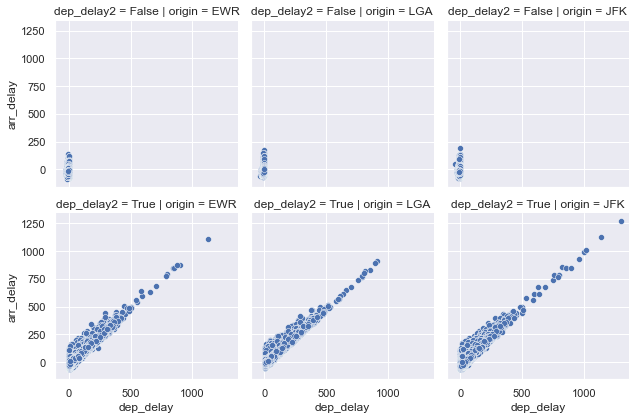

In [7]:
# Chia loại theo cột 'origin' và 'dep_delay2'
bieudo1 = sns.FacetGrid(fdata, height=3, 
                        col='origin', row='dep_delay2'
                       )

# Vẽ biểu đồ tương quan giữa 'dep_delay' và 'arr_delay'
bieudo1.map(sns.scatterplot, 'dep_delay', 'arr_delay')

==> Nhận xét:
- Trong các chuyến bay xuất phát đúng giờ vẫn có các chuyến bay đến nơi trễ
- Hầu hết chuyến bay xuất phát trễ đều đến nơi trễ

**Kiểm tra phân bố về thời gian xuất phát trễ ở các sân bay**

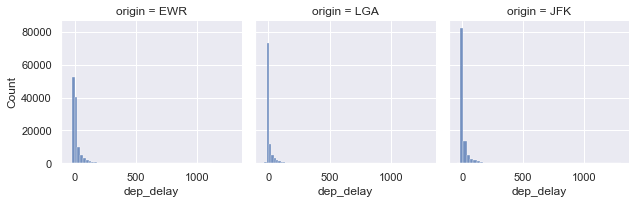

In [8]:
# Chia loại theo cột 'origin'
bieudo2 = sns.FacetGrid(fdata, col='origin')

# Vẽ biểu đồ histogram của phân bố 'dep_delay'
bieudo2.map_dataframe(sns.histplot, x='dep_delay', bins=50)

**So sánh số lượng chuyến bay trễ và không trễ của 3 sân bay**

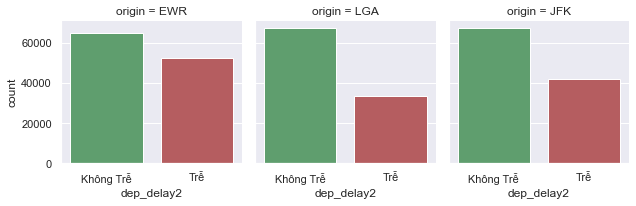

In [9]:
# Chia loại theo 'orign'
bieudo3 = sns.FacetGrid(fdata, col='origin')

# Vẽ biểu đồ countplot()
bieudo3.map_dataframe(sns.countplot, 
                      x='dep_delay2', 
                      palette=['g','r'],
                     )

bieudo3.set_xticklabels(['Không Trễ', 'Trễ'])
plt.show()

## 2. Phân tích tình trạng trễ chuyến theo buổi trong ngày ở các sân bay

In [10]:
# Thêm cột dữ liệu 'tod' theo 3 buổi: Sáng, Chiều, Tối
# tod: time of day (Morning, Afternoon, Evening)
tod = pd.Series(['Tối'] * fdata['hour'].size)
tod[fdata['hour'] < 12] = 'Sáng'
tod[(12 <= fdata['hour']) & (fdata['hour'] <18)] = "Chiều"
fdata['tod'] = tod
fdata.drop(['hour','minute'], inplace=True, axis=1)
fdata.sample(5)

,year,month,day,dep_delay,arr_delay,carrier,origin,air_time,distance,dep_delay2,tod
186943,2013,4,29,-9.0,-23.0,EV,LGA,56.0,378,False,Tối
264675,2013,7,24,-1.0,4.0,US,LGA,39.0,184,False,Chiều
99866,2013,12,21,68.0,48.0,B6,JFK,138.0,1028,True,Sáng
253413,2013,7,12,-4.0,7.0,UA,EWR,148.0,1023,False,Chiều
92114,2013,12,12,14.0,15.0,DL,LGA,153.0,1076,True,Chiều


**Chia ra theo buổi của mỗi sân bay**

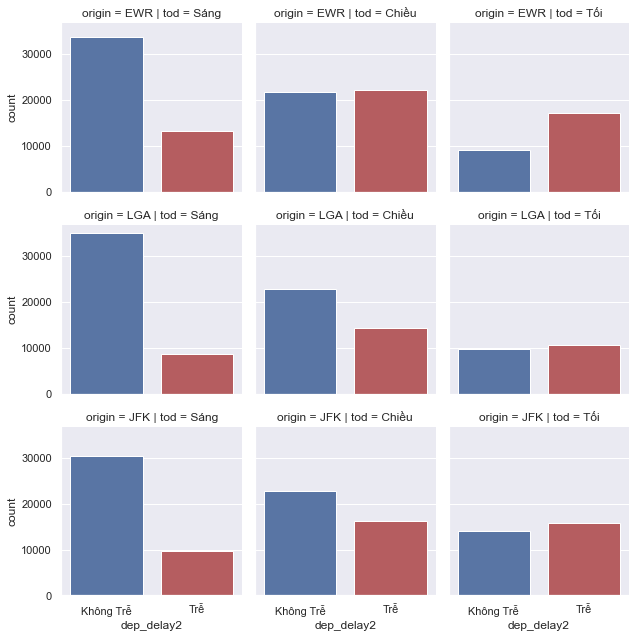

In [11]:
bieudo4 = sns.FacetGrid(fdata, col='tod', row='origin')

# Đếm số chuyến bay trễ vs. không-trễ theo các buổi ở mỗi sân bay
bieudo4.map_dataframe(sns.countplot, 
                      x='dep_delay2', 
                      palette=["b", "r"],
                      dodge=True)
bieudo4.set(xticks = [0, 1], xticklabels=['Không Trễ', 'Trễ'])
#bieudo4.set_xticklabels(['Không Trễ', 'Trễ'])

## 3. Phân tích tình trạng trễ chuyến theo ngày trong tuần ở các sân bay

In [12]:
dow = ['Monday', 'Tuesday', 'Wednesday', 
       'Thursday', 'Friday', 'Saturday', 'Sunday']

In [13]:
# Thêm cột dữ liệu 'dow' (day of week)
fdata['dow'] = pd.to_datetime(fdata[['year', 'month', 'day']]).dt.day_name()
fdata.drop(['year', 'month', 'day'], inplace=True, axis=1)
fdata.sample(5)

,dep_delay,arr_delay,carrier,origin,air_time,distance,dep_delay2,tod,dow
299257,-12.0,-28.0,MQ,LGA,160.0,1147,False,Chiều,Friday
231307,24.0,21.0,UA,EWR,206.0,1400,True,Chiều,Monday
176338,-8.0,-16.0,EV,EWR,100.0,642,False,Sáng,Thursday
97462,5.0,-7.0,UA,EWR,135.0,997,True,Tối,Wednesday
266396,-6.0,7.0,DL,JFK,280.0,1990,False,Chiều,Friday


**Vẽ biểu đồ số chuyến bay trễ và không trễ ở mỗi sân bay theo ngày trong tuần**

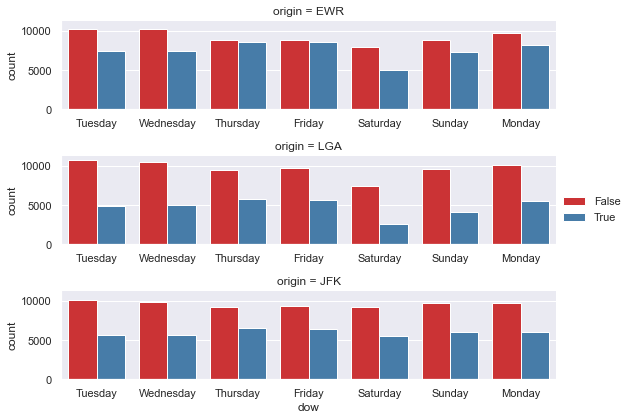

In [14]:
# Chia loại theo cột 'origin'
bieudo5 = sns.FacetGrid(fdata, row='origin',
                        sharex=False, sharey=True,
                        height=2, aspect=4, 
                        #gridspec_kws={"hspace":0.4},
                       )

bieudo5.map_dataframe(sns.countplot, x='dow', 
                      # order='dow', 
                      hue='dep_delay2', 
                      palette='Set1'
                     )
bieudo5.add_legend()

**Vẽ biểu đồ số chuyến bay trễ ở mỗi sân bay theo ngày trong tuần**

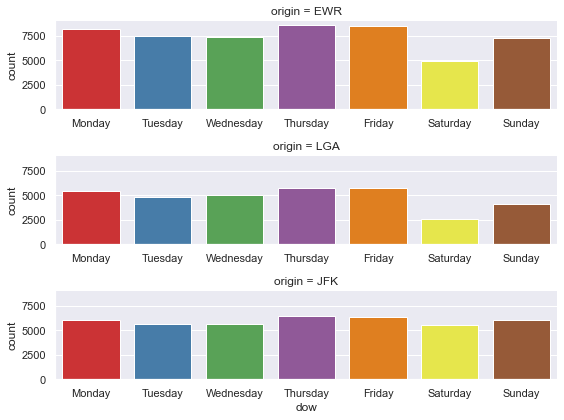

In [15]:
# Chỉ lọc ra các chuyến bay trễ
bieudo5 = sns.FacetGrid(fdata[fdata['dep_delay2']==True], 
                        row='origin', #hue='dep_delay2',
                        sharex=False, sharey=True,
                        height=2, aspect=4, 
                        #gridspec_kws={"hspace":0.4},
                       )

bieudo5.map_dataframe(sns.countplot, x='dow', #hue='dep_delay2', 
                      order=dow,
                      palette='Set1', 
                      dodge=True)

# PairGrid

**LƯU Ý: CẦN THẬN TRỌNG KHI VẼ PAIRPLOT CHO TOÀN BỘ DATAFRAME!!!**<br>
**============ VỚI DỮ LIỆU LỚN CÓ THỂ TREO MÁY ============**

In [16]:
# Ví dụ: Thực hiện với chỉ sân bay JFK
fdata2 = fdata[fdata['origin'] == 'JFK']

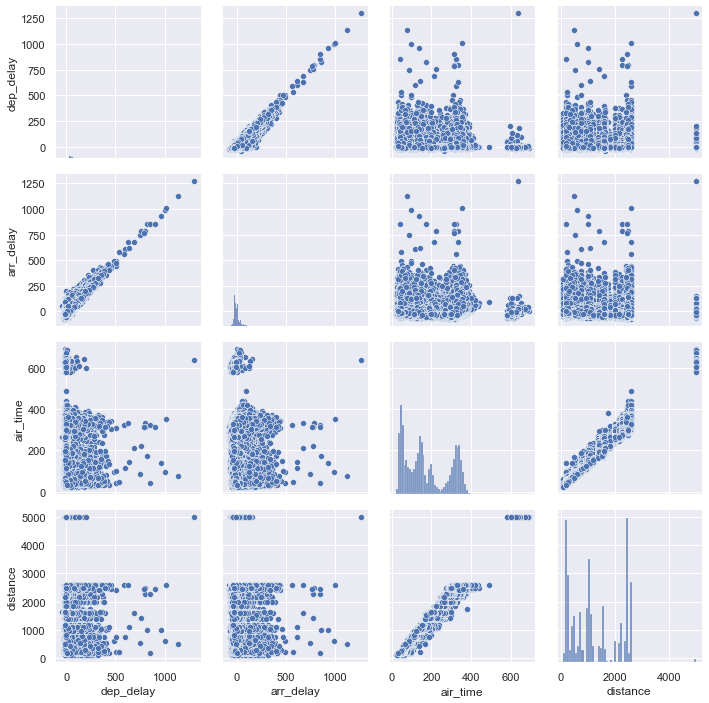

In [17]:
# Sử dụng PairGrid 
grid1 = sns.PairGrid(fdata2[['dep_delay', 'arr_delay', 'air_time', 'distance']])
grid1.map_offdiag(sns.scatterplot)
grid1.map_diag(sns.histplot)